<a href="https://colab.research.google.com/github/Naveen-King/EDA-Hotel-booking-Analysis/blob/main/EDA_Hotel_booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <font size="+2" color='#053c96'><b> Project Name </b></font>

$\color{red}{\text{Hotel booking demand}}$

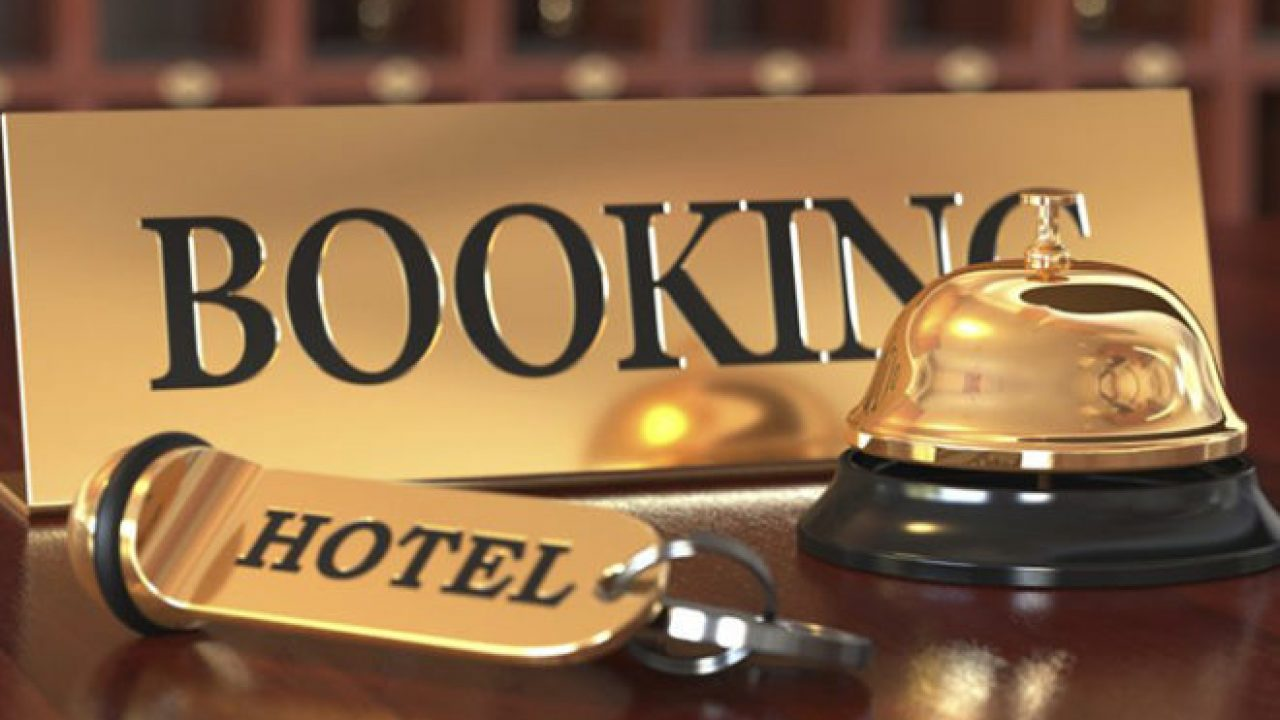

##### **Project Type**    - Exploratory Data Analysis
##### **Contribution**    - Individual
##### **Team Member 1**-  $\color{green}{\text{Navneet Singh}}$

#<font size="+2" color='#053c96'><b> Problem Statement </b></font>

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This project aims to create meaningful estimators from the data set we have and to perform Exploratory Data Analysis so that if anyone who wishes to proceed with the Machine Learning Model, can do so.

#<font size="+2" color='#053c96'><b> GitHub Link </b></font>

https://github.com/Naveen-King/EDA-Hotel-booking-Analysis

#<font size="+2" color='#053c96'><b> Understanding the Data </b></font>

This data set contains booking information for a city hotel and a resort hotel and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has from the data. We will perform exploratory data analysis with python to get insight from the data.

#<font size="+2" color='#053c96'><b> Project Workflow </b></font>

1. Importing Libraries

2. Loading the Dataset

3. Data Cleaning

4. Feature Engineering

5. EDA 


In [132]:
# Importing neccesary libraries.

import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [133]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [134]:
# Read in the datasets
hotel_raw_df = pd.read_csv('/content/drive/MyDrive/Capstone Project/hotel_bookings.csv')

In [135]:
# Dataset First 
hotel_raw_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [136]:
hotel_raw_df.shape

(119390, 32)

In [137]:
hotel_raw_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [138]:
hotel_raw_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [139]:
hotel_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [123]:
# checking for null values 

null_values = pd.DataFrame({'Null Values' : hotel_raw_df.isna().sum(), 'Percentage Null Values' : (hotel_raw_df.isna().sum()) / (hotel_raw_df.shape[0]) * (100)})
null_values

,Null Values,Percentage Null Values
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


We can also check the total number of null values in every column instead of the percentage.

In [140]:
# check for missing values

hotel_raw_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Adults, babies, and children can’t be zero at the same time, so dropping the rows having all these zero at the same time because will mean that the hotel/room was not even booked.

In [125]:
filter = (hotel_raw_df.children == 0) & (hotel_raw_df.adults == 0) & (hotel_raw_df.babies == 0)
hotel_raw_df[~filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


We’ve now cleaned up and prepared the dataset for analysis. Let’s take a look at a sample of rows from the data frame.

In [126]:
hotel_raw_df.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
54687,City Hotel,0,199,2016,July,30,23,2,1,2,...,No Deposit,9.0,NaN,0,Transient-Party,168.30,0,2,Check-Out,2016-07-26
25319,Resort Hotel,0,48,2016,June,26,20,1,1,2,...,No Deposit,240.0,NaN,0,Transient-Party,201.00,1,0,Check-Out,2016-06-22
98194,City Hotel,0,21,2016,September,40,25,1,0,1,...,No Deposit,7.0,NaN,0,Transient,87.01,0,1,Check-Out,2016-09-26
58773,City Hotel,1,286,2016,October,43,16,1,0,2,...,Non Refund,44.0,NaN,0,Transient,90.00,0,0,Canceled,2016-06-20
32869,Resort Hotel,0,10,2017,February,6,6,1,1,3,...,No Deposit,NaN,507.0,0,Transient-Party,120.00,0,0,Check-Out,2017-02-08
17499,Resort Hotel,0,18,2015,October,42,12,1,0,1,...,No Deposit,146.0,NaN,0,Transient-Party,37.00,0,0,Check-Out,2015-10-13
109197,City Hotel,0,45,2017,April,14,7,0,1,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,0,Check-Out,2017-04-08
13063,Resort Hotel,1,306,2017,July,30,29,2,5,2,...,No Deposit,242.0,NaN,0,Transient,204.62,0,1,Canceled,2016-11-19
35894,Resort Hotel,0,96,2017,April,17,29,2,3,2,...,No Deposit,177.0,NaN,0,Transient,43.20,0,0,Check-Out,2017-05-04
97926,City Hotel,0,80,2016,September,38,17,2,3,2,...,No Deposit,9.0,NaN,0,Transient,149.40,0,2,Check-Out,2016-09-22


## **Exploratory Analysis and Visualization**

Before we ask questions about the hotels, it would help to understand the guests’ demographics, i.e., country, arrival date, month, customer type, etc. It’s essential to explore these variables to understand the data better. A survey of this scale generally tends to have some selection bias.

In [141]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### **Country**

Let’s look at the number of countries from which the total bookings are made and plot the ten countries with the highest number of countries. This will also include the bookings which were later canceled. No issues we just need to take a look at the overall data.

In [142]:
hotel_raw_df.country

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object

The country names seem to be in shortcodes but we are normally interested in the top 10 countries and we will then convert those country codes into their respective names. There are multiple bookings made from the same country and the above data is the representation of all. We need to first check the unique(no repetition) countries from where the bookings are made

In [143]:
hotel_raw_df.country.nunique()

177

This shows there is a total of 177 countries from where the bookings are made to these 2 hotels. We can identify the countries with the highest number of bookings using the value_counts method.

In [144]:
top_countries_with_codes = hotel_raw_df.country.value_counts().head(10)
top_countries_with_codes

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

This shows us the top 10 countries from where the bookings are made.

PRT — Portugal, GBR — United Kingdom, FRA — France, ESP — Spain, DEU — Germany, ITA — Italy, IRL — Ireland, BEL — Belgium, BRA — Brazil, NLD — Netherlands.

We can visualize this information using a bar chart.

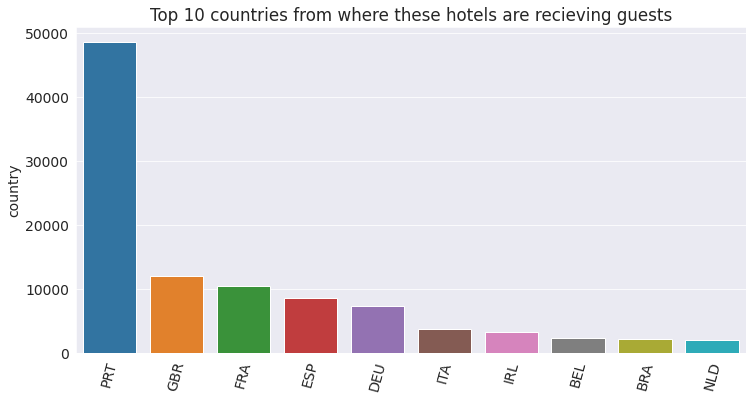

In [145]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top 10 countries from where these hotels are recieving guests')
sns.barplot(x=top_countries_with_codes.index, y=top_countries_with_codes);

But I am not satisfied with the result.

Let’s download another CSV file containing the ISO3 codes for various countries, and read the data into another Pandas data frame. We will match the codes with the countries and will write it back to our main hotel_raw_df.

In [146]:
country_code = pd.read_csv('/content/drive/MyDrive/Capstone Project/countries_codes_and_coordinates.csv')
country_code

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,"""AF""","""AFG""","""4""","""33""","""65"""
1,Albania,"""AL""","""ALB""","""8""","""41""","""20"""
2,Algeria,"""DZ""","""DZA""","""12""","""28""","""3"""
3,American Samoa,"""AS""","""ASM""","""16""","""-14.3333""","""-170"""
4,Andorra,"""AD""","""AND""","""20""","""42.5""","""1.6"""
...,...,...,...,...,...,...
251,Wallis and Futuna,"""WF""","""WLF""","""876""","""-13.3""","""-176.2"""
252,Western Sahara,"""EH""","""ESH""","""732""","""24.5""","""-13"""
253,Yemen,"""YE""","""YEM""","""887""","""15""","""48"""
254,Zambia,"""ZM""","""ZMB""","""894""","""-15""","""30"""


We are only interested in the ‘Alpha-3 code’ column but there is one issue. The values seem to have double quotes in them which will create a problem for us if we try to match them with another data frame. So first let’s remove the double quotes and then drop the unnecessary columns.

In [147]:
country_code['country'] = country_code['Alpha-3 code'].str.replace('"','')
country_code

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average),country
0,Afghanistan,"""AF""","""AFG""","""4""","""33""","""65""",AFG
1,Albania,"""AL""","""ALB""","""8""","""41""","""20""",ALB
2,Algeria,"""DZ""","""DZA""","""12""","""28""","""3""",DZA
3,American Samoa,"""AS""","""ASM""","""16""","""-14.3333""","""-170""",ASM
4,Andorra,"""AD""","""AND""","""20""","""42.5""","""1.6""",AND
...,...,...,...,...,...,...,...
251,Wallis and Futuna,"""WF""","""WLF""","""876""","""-13.3""","""-176.2""",WLF
252,Western Sahara,"""EH""","""ESH""","""732""","""24.5""","""-13""",ESH
253,Yemen,"""YE""","""YEM""","""887""","""15""","""48""",YEM
254,Zambia,"""ZM""","""ZMB""","""894""","""-15""","""30""",ZMB


In [148]:
del country_code['Alpha-2 code']

In [149]:
del country_code['Alpha-3 code']

In [150]:
del country_code['Numeric code']

In [151]:
del country_code['Latitude (average)']

In [152]:
del country_code['Longitude (average)']

In [153]:
country_code['country'] = country_code['country'].str.replace(' ','')
country_code['country']

0      AFG
1      ALB
2      DZA
3      ASM
4      AND
      ... 
251    WLF
252    ESH
253    YEM
254    ZMB
255    ZWE
Name: country, Length: 256, dtype: object

Now we are only left with the country code naming ‘country’ which we can map with the hotel_raw_df column ‘country’. Let’s merge these two data frames and put the result into a new data frame called hotel_df.

In [154]:
hotel_df = pd.merge(hotel_raw_df, country_code)
hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Country
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,Portugal
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,Portugal
2,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03,Portugal
3,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,303.0,NaN,0,Transient,103.00,0,1,Check-Out,2015-07-03,Portugal
4,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,240.0,NaN,0,Transient,82.00,0,1,Canceled,2015-05-06,Portugal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118490,City Hotel,0,6,2017,June,24,11,2,1,2,...,28.0,NaN,0,Transient,99.00,0,1,Check-Out,2017-06-14,Sudan
118491,City Hotel,0,116,2017,July,27,2,2,0,2,...,9.0,NaN,0,Transient,126.00,0,0,Check-Out,2017-07-04,French Southern Territories
118492,City Hotel,0,84,2017,July,30,27,2,5,2,...,9.0,NaN,0,Transient,121.43,0,1,Check-Out,2017-08-03,Sierra Leone
118493,City Hotel,0,2,2017,August,32,9,0,3,2,...,9.0,NaN,0,Transient,183.33,0,1,Check-Out,2017-08-12,Lao People's Democratic Republic


Let’s again look at the top 10 countries from where these hotels are receiving booking requests.

In [155]:
top_countries = hotel_df.Country.value_counts().head(10)
top_countries

Portugal          48590
United Kingdom    12129
France            10415
Spain              8568
Germany            7287
Italy              3766
Ireland            3375
Belgium            2342
Brazil             2224
Netherlands        2104
Name: Country, dtype: int64

Again we can visualize this information using a bar chart.

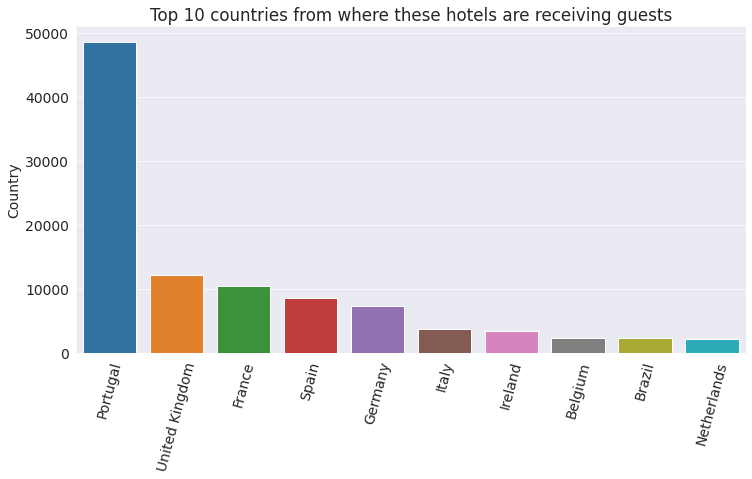

In [156]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top 10 countries from where these hotels are receiving guests')
sns.barplot(x=top_countries.index, y=top_countries);

It appears that a disproportionately high number of bookings are from Portugal, probably because the hotel is located in Portugal itself. The second country is the United Kingdom which is approx. 75% behind.

### **Country wise guest**

Let’s look at the country-wise guests that both the hotels in total have received. The data on canceled bookings will not be included here.

In [157]:
country_wise_guests = hotel_df[hotel_df['is_canceled'] == 0]['Country'].value_counts().reset_index()
country_wise_guests.columns = ['Country', 'No of guests']
country_wise_guests

,Country,No of guests
0,Portugal,21071
1,United Kingdom,9676
2,France,8481
3,Spain,6391
4,Germany,6069
...,...,...
167,Bahamas,1
168,Macao,1
169,Tajikistan,1
170,Djibouti,1


Let’s check out the top 10 countries from where the guests are coming and see if there is any change in the data on a number of bookings(with cancellation included) and the number of bookings without cancellation.

In [158]:
top_countries_guests = country_wise_guests.head(10)
top_countries_guests

,Country,No of guests
0,Portugal,21071
1,United Kingdom,9676
2,France,8481
3,Spain,6391
4,Germany,6069
5,Ireland,2543
6,Italy,2433
7,Belgium,1868
8,Netherlands,1717
9,United States,1596


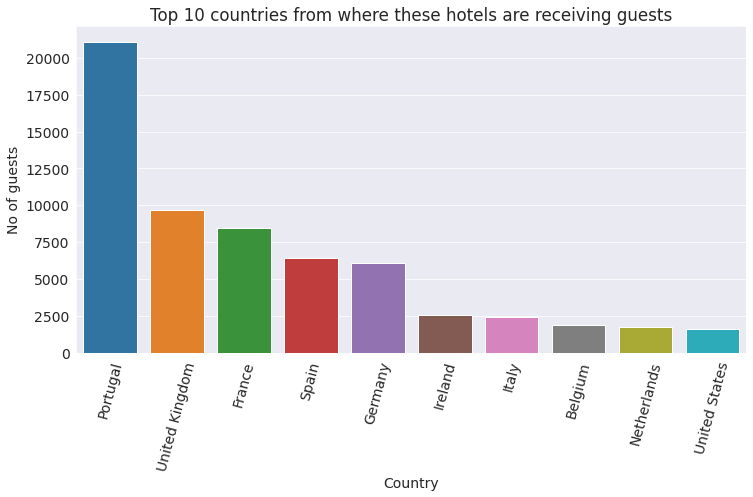

In [159]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top 10 countries from where these hotels are receiving guests')
sns.barplot(x=top_countries_guests.Country, y=top_countries_guests['No of guests']);

As we can see there is a slight change in the data. Brazil is nowhere to be found in this graph and United States has taken 10th place in the number of guests not canceling their bookings.

### **How much do guests pay for a room per night?**

Let’s check out the price paid(in one night) by the guests who are staying in these hotels. Both hotels have different room types and different meal arrangements. Seasonal factors are also important. So the prices vary a lot. Since no currency information is given, but Portugal is part of the European Monetary Union, We will assume that all prices are in EUR. We will only be counting adults and children as paying guests only, not babies.

In [160]:
resort_hotel = hotel_df.loc[(hotel_df["hotel"] == "Resort Hotel") & (hotel_df["is_canceled"] == 0)]
city_hotel = hotel_df.loc[(hotel_df["hotel"] == "City Hotel") & (hotel_df["is_canceled"] == 0)]

In [161]:
# Counting adults and children as paying guests only, not babies.

resort_hotel["adr_pp"] = resort_hotel["adr"] / (resort_hotel["adults"] + resort_hotel["children"])

<ipython-input-161-d523f5795614>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resort_hotel["adr_pp"] = resort_hotel["adr"] / (resort_hotel["adults"] + resort_hotel["children"])


As the dataset contains infinite values we might have to remove those infinite values in order to calculate the mean or max. In this situation I am replacing infinite values with 0.

In [162]:
import numpy as np
resort_hotel_filtered = resort_hotel.replace([np.inf, -np.inf], 0)

In [163]:
city_hotel["adr_pp"] = city_hotel["adr"] / (city_hotel["adults"] + city_hotel["children"])

<ipython-input-163-1d77bf61bd9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_hotel["adr_pp"] = city_hotel["adr"] / (city_hotel["adults"] + city_hotel["children"])


In [164]:
city_hotel_filtered = city_hotel.replace([np.inf, -np.inf], 0)

Let’s print out the output.

In [165]:
print("""From all non-cnceled bookings, across all room types and meals, the average prices are:
Resort hotel: {:.2f} € per night and person.
City hotel: {:.2f} € per night and person."""
      .format(resort_hotel_filtered["adr_pp"].mean(), city_hotel_filtered["adr_pp"].mean()))

From all non-cnceled bookings, across all room types and meals, the average prices are:
Resort hotel: 47.56 € per night and person.
City hotel: 59.29 € per night and person.


In [166]:
# normalize price per night (adr):

hotel_df["adr_pp"] = hotel_df["adr"] / (hotel_df["adults"] + hotel_df["children"])
hotel_df_guests = hotel_df.loc[hotel_df["is_canceled"] == 0]
hotel_df_guests

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Country,adr_pp
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,Portugal,0.000
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,Portugal,0.000
2,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03,Portugal,53.500
3,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,NaN,0,Transient,103.00,0,1,Check-Out,2015-07-03,Portugal,51.500
7,Resort Hotel,0,35,2015,July,27,1,0,4,2,...,NaN,0,Transient,145.00,0,0,Check-Out,2015-07-05,Portugal,72.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118490,City Hotel,0,6,2017,June,24,11,2,1,2,...,NaN,0,Transient,99.00,0,1,Check-Out,2017-06-14,Sudan,49.500
118491,City Hotel,0,116,2017,July,27,2,2,0,2,...,NaN,0,Transient,126.00,0,0,Check-Out,2017-07-04,French Southern Territories,63.000
118492,City Hotel,0,84,2017,July,30,27,2,5,2,...,NaN,0,Transient,121.43,0,1,Check-Out,2017-08-03,Sierra Leone,60.715
118493,City Hotel,0,2,2017,August,32,9,0,3,2,...,NaN,0,Transient,183.33,0,1,Check-Out,2017-08-12,Lao People's Democratic Republic,91.665


In [168]:
# only actual guests

room_prices = hotel_df_guests[["hotel", "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")
room_prices

,hotel,reserved_room_type,adr_pp
69784,City Hotel,A,72.050
66245,Resort Hotel,A,39.600
66246,Resort Hotel,A,43.100
97376,Resort Hotel,A,24.000
66248,Resort Hotel,A,60.335
...,...,...,...
112594,Resort Hotel,H,79.476
582,Resort Hotel,L,100.000
183,Resort Hotel,L,37.500
8934,Resort Hotel,L,86.000


Let’s plot a graph to visualize the data and understand it in a better way. This time we will use boxplot.

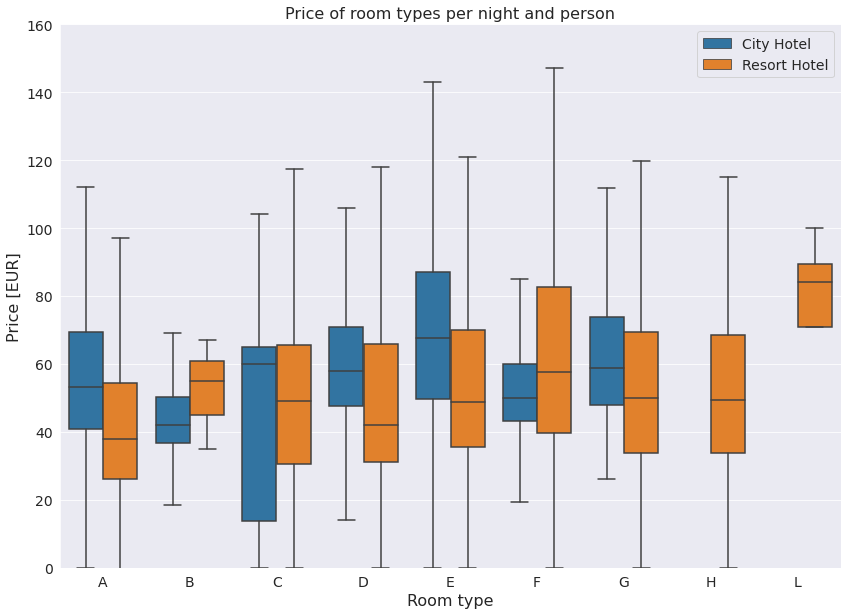

In [169]:
# boxplot:
plt.figure(figsize=(14, 10))
sns.boxplot(x="reserved_room_type",
            y="adr_pp",
            hue="hotel",
            data=room_prices, 
            hue_order=["City Hotel", "Resort Hotel"],
            fliersize=0)
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()

This figure shows the average price per room, depending on its type and the standard deviation. Note that due to data anonymization rooms with the same type letter may not necessarily be the same across hotels.

### **How does the price per night vary over the year?**

To keep it simple, I’m using the average price per night and person, regardless of the room type and meal.


In [170]:
# grab data:

room_prices_monthly = hotel_df_guests[["hotel", "arrival_date_month", "adr_pp"]].sort_values("arrival_date_month")
room_prices_monthly

,hotel,arrival_date_month,adr_pp
39283,City Hotel,April,67.0
12683,Resort Hotel,April,25.0
12682,Resort Hotel,April,33.0
12681,Resort Hotel,April,40.0
12680,Resort Hotel,April,48.5
...,...,...,...
19286,City Hotel,September,57.5
19285,City Hotel,September,0.0
19283,City Hotel,September,85.5
57177,City Hotel,September,57.0


In [171]:
# order by month:

ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August",
                  "September", "October", "November", "December"]
room_prices_monthly["arrival_date_month"] = pd.Categorical(room_prices_monthly["arrival_date_month"], categories=ordered_months, ordered=True)

Let’s plot a barplot to see the deviation.

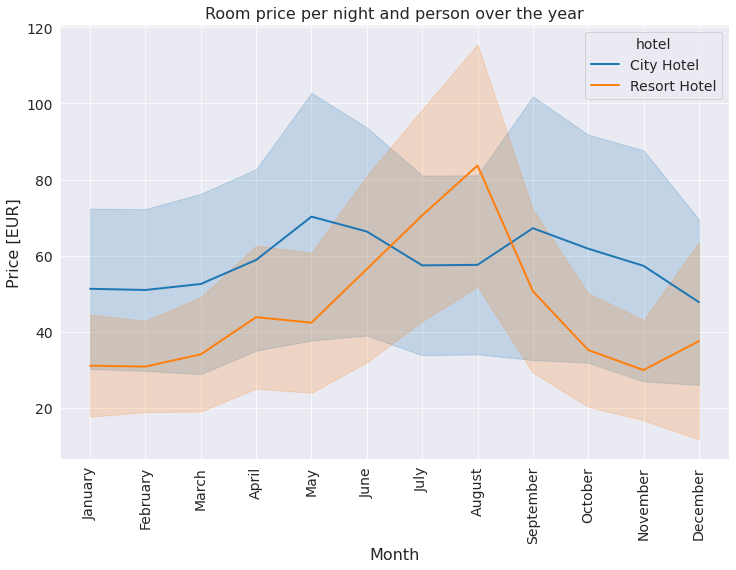

In [172]:
# barplot with standard deviation:

plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr_pp", hue="hotel", data=room_prices_monthly, 
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2, 2))
plt.title("Room price per night and person over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=90)
plt.ylabel("Price [EUR]", fontsize=16)
plt.show()

This clearly shows that the prices in the Resort hotel are much higher during the month of August. There is summer season there in portugal at that time. The price of the city hotel varies less and is most expensive during may and september where there is spring and autumn season respectively.

# **Asking and Answering Questions**

## **Q1: How many guests are there who have repeatedly canceled the bookings?**

We will plot this information using a countplot by seaborn.

In [173]:
hotel_df['is_repeated_guest'] = hotel_df['is_repeated_guest'].replace(0,'No')
hotel_df['is_repeated_guest'] = hotel_df['is_repeated_guest'].replace(1,'Yes')

In [174]:
hotel_df['is_repeated_guest']

0         No
1         No
2         No
3         No
4         No
          ..
118490    No
118491    No
118492    No
118493    No
118494    No
Name: is_repeated_guest, Length: 118495, dtype: object

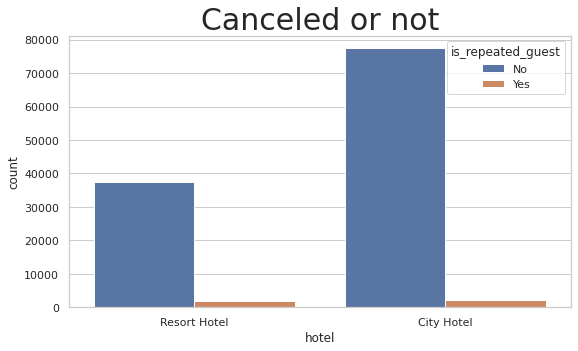

In [175]:
sns.set(style = "whitegrid")
plt.title("Canceled or not", fontdict = {'fontsize': 30})
canceled = sns.countplot(x = hotel_df.hotel, hue = 'is_repeated_guest', data = hotel_df)

## **Q2: Let’s check in which hotel people like to stay and spend more time.**

We will check this on weekdays and weekends separately, because we might see a skew distribution here. First let’s plot the boxplot market segment wise and we will first check for the week nights stay. The market segment will tell us what type of stay is it.

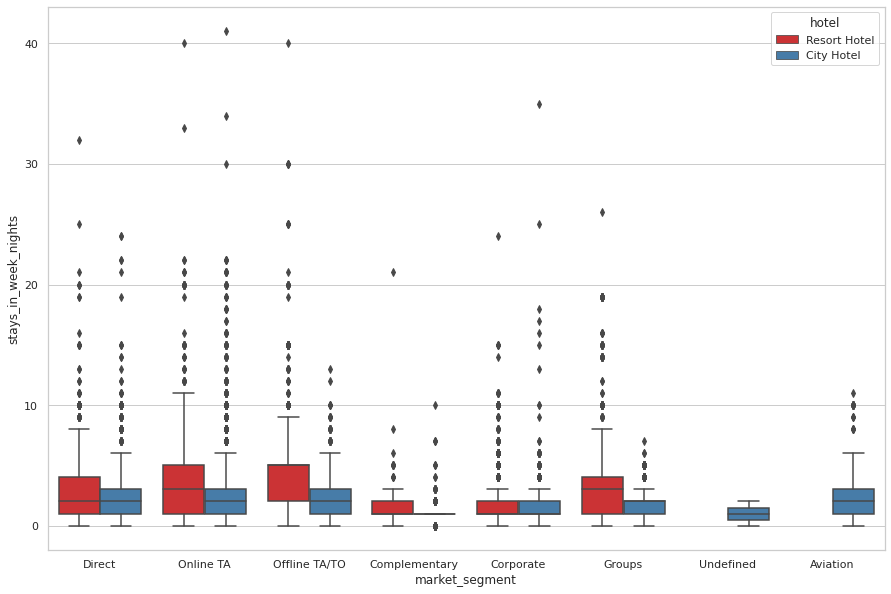

In [176]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "market_segment", y = "stays_in_week_nights", data = hotel_df, hue = "hotel", palette = 'Set1');

Now let’s plot the boxplot market segment wise and we will now check for the weekends stay.

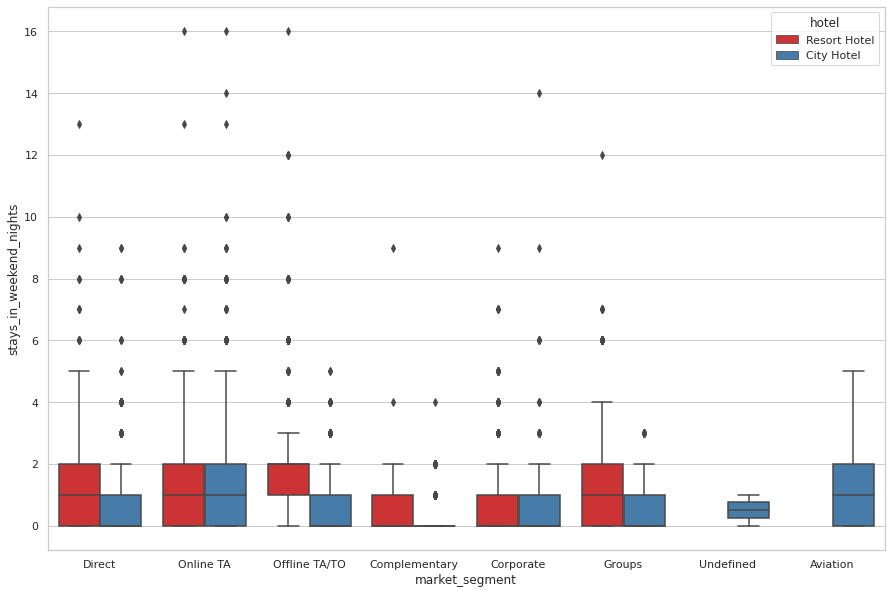

In [177]:
plt.figure(figsize=(15,10))
sns.boxplot(x = "market_segment", y = "stays_in_weekend_nights", data = hotel_df, hue = "hotel", palette = 'Set1');

It can be seen that most of the groups are normally distributed, some of them have high skewness. Looking at the distribution, it can be concluded that most people do not seem to prefer to stay at the hotel for more than 1 week. But it seems normal to stay in resort hotels for up to 12–13 days. Although this changes according to the segments, staying longer than 15 days certainly creates outliers for each segment. If the total time feature was created by summing up the weekend and week nights, this would be clearer, but it can be clearly seen when looking at the two visualizations together.

As it turns out, customers from Aviation Segment do not seem to be staying at the resort hotels and have a relatively lower day average. Apart from that, the weekends and weekdays averages are roughly equal. Customers in the Aviation Segment are likely to arrive shortly due to business. Also probably most airports are a bit away from sea and its most likely to be closer to city hotels.

It is obvious that when people go to resort hotels, they prefer to stay more.

Let’s plot the countplot by market segment distribution.

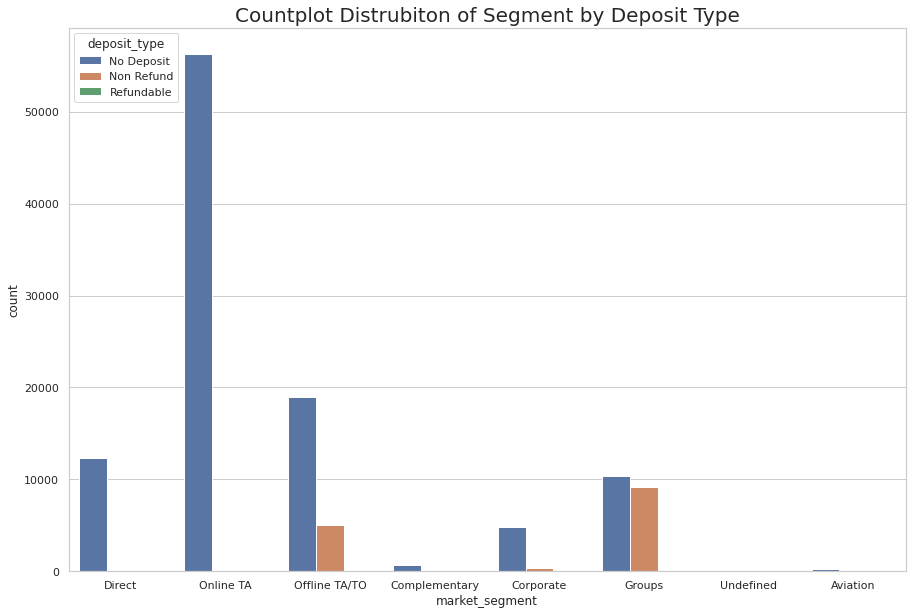

In [178]:
plt.figure(figsize = (15,10))
sns.set(style = "whitegrid")
plt.title("Countplot Distrubiton of Segment by Deposit Type", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", hue = 'deposit_type', data = hotel_df)

## **Q3: What is the effects of deposit on cancellations by segments.**

Let’s check the countplot distribution by cancellation in those market segments.

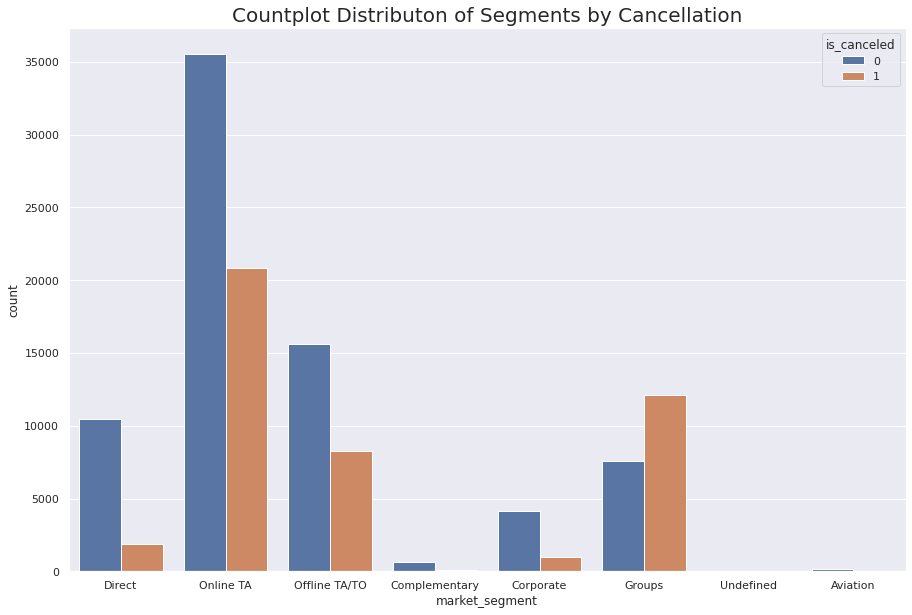

In [179]:
plt.figure(figsize = (15,10))
sns.set(style = "darkgrid")
plt.title("Countplot Distributon of Segments by Cancellation", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", hue = 'is_canceled', data = hotel_df)

When looking at Offline TA/TO and Groups, the only circumstances in which the payment was received were those in which the groups arrived. Applying a deposit for a sizable number of guests who will occupy a sizable portion of the hotel’s capacity is quite logical.

I first assumed that the market segments where a deposit is applied would have a lower cancellation rate than the segments where no deposit is applied. However, it appears that this is not the case when we look at the cancellations according to the segments in the other representation.

    The cancellation rate for groups is greater than 50%.
    The cancellation rate for offline TA/TOs (Travel Agents/Tour Operators) and online TAs is greater than 33%.
    Direct segments have a lower rate of cancellation.

It is interesting that despite applying a deposit, the cancellation rate in these parts is significant. This scenario might be somewhat explained by the fact that cancellations are made jointly like bookings.

Online reservation cancellation rates are typical for a dynamic environment with significant circulation.

The fact that the cancellation rate in the direct segment is so low is another issue that caught my attention. In the event when people are speaking one-on-one, I believe that a mutually trusting relationship has been built at this time. I won’t linger too much on this, but I believe there is a psychological element at play.

## **Q4: What is the relationship of lead time with cancellation.**

We will plot a density curve of lead time by cancellation.

In [180]:
hotel_df['is_canceled'] = hotel_df['is_canceled'].replace(0,'No')
hotel_df['is_canceled'] = hotel_df['is_canceled'].replace(1,'Yes')

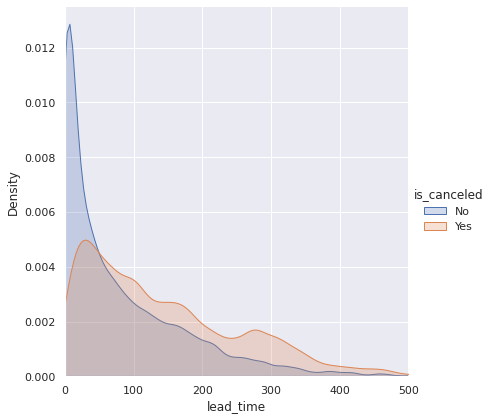

In [181]:
(sns.FacetGrid(hotel_df, hue = 'is_canceled',
             height = 6,
             xlim = (0,500))
    .map(sns.kdeplot, 'lead_time', shade = True)
    .add_legend());

When the lead time exceeds about 60, guests frequently cancel their bookings (cancellation rate is higher after this point). Additionally, people want their vacation or work schedules to be calculated across 100 days, or 50% of the data.

## **Q5: What is the monthly customers each hotel is receiving?**

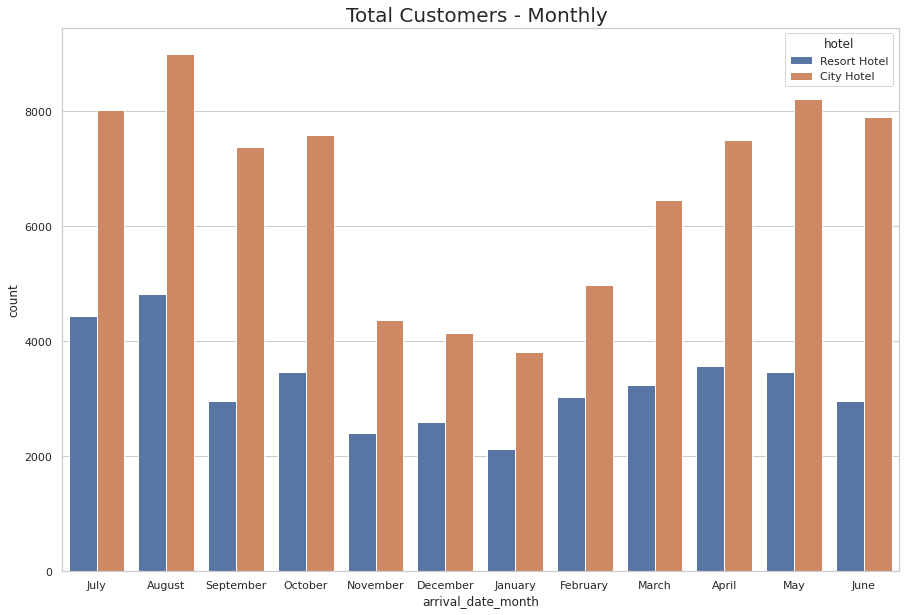

In [182]:
plt.figure(figsize =(15,10))
sns.set(style="whitegrid")
plt.title("Total Customers - Monthly ", fontdict={'fontsize': 20})
ax = sns.countplot(x = "arrival_date_month", hue = 'hotel', data = hotel_df)

The first graph shows that city hotels receive more guests throughout the year. Resort hotels appear to be slightly closer to city hotels in the summer when comparing proportions.

## **Q6: Which are the most busy month?**

In [183]:
# Create a DateFrame with the relevant data:
resort_guests_monthly = resort_hotel.groupby("arrival_date_month")["hotel"].count()
city_guests_monthly = city_hotel.groupby("arrival_date_month")["hotel"].count()

resort_guest_data = pd.DataFrame({"month": list(resort_guests_monthly.index),
                    "hotel": "Resort hotel", 
                    "guests": list(resort_guests_monthly.values)})

city_guest_data = pd.DataFrame({"month": list(city_guests_monthly.index),
                    "hotel": "City hotel", 
                    "guests": list(city_guests_monthly.values)})
full_guest_data = pd.concat([resort_guest_data,city_guest_data], ignore_index=True)

In [184]:
# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_guest_data["month"] = pd.Categorical(full_guest_data["month"], categories=ordered_months, ordered=True)

In [185]:
# Dataset contains July and August date from 3 years, the other month from 2 years. Normalize data:
full_guest_data.loc[(full_guest_data["month"] == "July") | (full_guest_data["month"] == "August"),
                    "guests"] /= 3
full_guest_data.loc[~((full_guest_data["month"] == "July") | (full_guest_data["month"] == "August")),
                    "guests"] /= 2

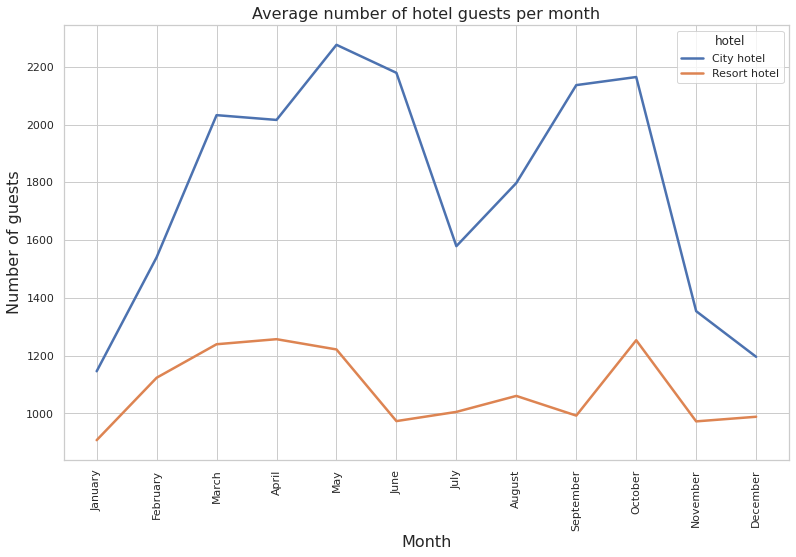

In [186]:
#show figure:
plt.figure(figsize=(13, 8))
sns.lineplot(x = "month", y="guests", hue="hotel", data=full_guest_data, 
             hue_order = ["City hotel", "Resort hotel"], size="hotel", sizes=(2.5, 2.5))
plt.title("Average number of hotel guests per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=90)
plt.ylabel("Number of guests", fontsize=16)
plt.show()

The City Hotel sees an increase in visitors in the spring and fall when rates are also the greatest. Less people arrive in July and August, when the prices are still lower.

From June through September, when costs are at their greatest, fewer guests stay at the Resort hotel. The winter season draws the fewest visitors to both hotels.

## **Q7- How many bookings were canceled?**

In [187]:
# absolute cancelations:
total_cancelations = hotel_raw_df["is_canceled"].sum()
resort_cancelations = hotel_raw_df.loc[hotel_raw_df["hotel"] == "Resort Hotel"]["is_canceled"].sum()
city_cancelations = hotel_raw_df.loc[hotel_raw_df["hotel"] == "City Hotel"]["is_canceled"].sum()

In [188]:
# as percent:
rel_cancel = total_cancelations / hotel_df.shape[0] * 100
rh_rel_cancel = resort_cancelations / hotel_raw_df.loc[hotel_raw_df["hotel"] == "Resort Hotel"].shape[0] * 100
ch_rel_cancel = city_cancelations / hotel_raw_df.loc[hotel_raw_df["hotel"] == "City Hotel"].shape[0] * 100

In [189]:
print(f"Total bookings canceled: {total_cancelations:,} ({rel_cancel:.0f} %)")
print(f"Resort hotel bookings canceled: {resort_cancelations:,} ({rh_rel_cancel:.0f} %)")
print(f"City hotel bookings canceled: {city_cancelations:,} ({ch_rel_cancel:.0f} %)")

Total bookings canceled: 44,224 (37 %)
Resort hotel bookings canceled: 11,122 (28 %)
City hotel bookings canceled: 33,102 (42 %)


# **Inferences and Conclusion**

We’ve drawn many inferences from the survey. Here’s a summary of a few of them:

1. It appears that a disproportionately high number of bookings are from Portugal, probably because the hotel is located in Portugal itself. The second country is the United Kingdom which is approx. 75% behind.

2. From all non-canceled bookings, across all room types and meals, the average prices are: — Resort hotel: 47.56 € per night and person. — City hotel: 59.29 € per night and person.

3. The prices in the Resort hotel are much higher during the month of August. There is summer season there in portugal at that time. The price of the city hotel varies less and is most expensive during may and september where there is spring and autumn season respectively.

4. Repeated guests do not cancel their reservations. Of course there are some exceptions. Also most of the customers are not repeated guests.

5. Most people do not seem to prefer to stay at the hotel for more than 1 week. But it seems normal to stay in resort hotels for up to 12–13 days. Although this changes according to the segments, staying longer than 15 days certainly creates outliers for each segment.

6. Customers from Aviation Segment do not seem to be staying at the resort hotels and have a relatively lower day average.

7. The weekends and weekdays averages are roughly equal.

8. Customers in the Aviation Segment are likely to arrive shortly due to business. Also probably most airports are a bit away from sea and its most likely to be closer to city hotels.

9. The cancellation rate for groups is greater than 50%.

10. The cancellation rate for offline TA/TOs (Travel Agents/Tour Operators) and online TAs is greater than 33%.

11. Direct segments have a lower rate of cancellation.

12. When the lead time exceeds about 60, guests frequently cancel their bookings (cancellation rate is higher after this point). Additionally, people want their vacation or work schedules to be calculated across 100 days, or 50% of the data.

13. City hotels receive more guests throughout the year. Resort hotels appear to be slightly closer to city hotels in the summer when comparing proportions.

14. The City Hotel sees an increase in visitors in the spring and fall when rates are also the greatest. Less people arrive in July and August, when the prices are still lower.

15. From June through September, when costs are at their greatest, fewer guests stay at the Resort hotel. The winter season draws the fewest visitors to both hotels.